In [1]:
import numpy as np
import pandas as pd
import pickle as pkl
import tensorflow as tf
ResNet50 = tf.keras.applications.resnet50.ResNet50
preprocess_input = tf.keras.applications.resnet50.preprocess_input
image = tf.keras.preprocessing.image
GlobalMaxPool2D = tf.keras.layers.GlobalMaxPool2D 
from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [2]:


# List filenames from the 'images' folder
fn = []
for file in os.listdir('images'):
    fn.append(os.path.join('images', file))


In [3]:
len(fn)

44441

In [4]:
#importinng resnt model and configuring it
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False
model = tf.keras.models.Sequential([model, GlobalMaxPool2D()])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [5]:
#extracting features form image
img = image.load_img('1528.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim=np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result=model.predict(img_preprocess).flatten()
norm_result=result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([0.        , 0.0319598 , 0.        , ..., 0.00272934, 0.04561884,
       0.01183027], dtype=float32)

In [6]:
#extracting features form image by function
def extract_features_from_images(image_path,model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim=np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result=model.predict(img_preprocess).flatten()
    norm_result=result/norm(result)
    return norm_result

In [7]:
extract_features_from_images(fn[0],model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([0.        , 0.01761619, 0.00171607, ..., 0.01247238, 0.027264  ,
       0.06899219], dtype=float32)

In [8]:
image_features=[]
for file in fn[0:44441]:
    image_features.append(extract_features_from_images(file,model))
image_features
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━

[array([0.        , 0.01761619, 0.00171607, ..., 0.01247238, 0.027264  ,
        0.06899219], dtype=float32),
 array([0.        , 0.03648943, 0.        , ..., 0.00997913, 0.02375534,
        0.04649905], dtype=float32),
 array([0.        , 0.03642146, 0.00710437, ..., 0.00140771, 0.        ,
        0.05435037], dtype=float32),
 array([0.00232166, 0.0503055 , 0.00747742, ..., 0.00346686, 0.03391019,
        0.04565743], dtype=float32),
 array([0.00306835, 0.06240452, 0.        , ..., 0.00170624, 0.02032885,
        0.05833261], dtype=float32),
 array([0.        , 0.10469119, 0.00198091, ..., 0.        , 0.03033769,
        0.02712847], dtype=float32),
 array([0.        , 0.12438459, 0.01465611, ..., 0.00289707, 0.04055161,
        0.06534589], dtype=float32),
 array([0.        , 0.09169203, 0.01569911, ..., 0.        , 0.00503581,
        0.0456004 ], dtype=float32),
 array([0.        , 0.09545276, 0.01153319, ..., 0.00073009, 0.04513267,
        0.07661068], dtype=float32),
 array([0.

In [9]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))
fn = pkl.dump(fn, open('filenames.pkl','wb'))

In [10]:
#Loading Pickle Files
Image_features = pkl.load(open('Images_features.pkl','rb'))
fn = pkl.load(open('filenames.pkl','rb'))
np.array(Image_features).shape

(4441, 2048)

In [11]:
#Finidng Simialar Images
neighbors = NearestNeighbors(n_neighbors=11, algorithm='brute', metric='euclidean')
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=11)

In [24]:
input_image = extract_features_from_images('1528.jpg',model)
distance,indices = neighbors.kneighbors([input_image])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [25]:
indices[0]

array([4436,  880,  879,  922,  921, 3924, 2612, 3238, 3599, 2452, 1238])

In [26]:
from IPython.display import Image

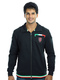

In [27]:
Image('1528.jpg')

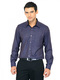

In [28]:
Image(fn[indices[0][1]])


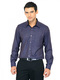

In [29]:
Image(fn[indices[0][2]])

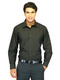

In [30]:
Image(fn[indices[0][3]])

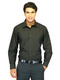

In [31]:
Image(fn[indices[0][4]])

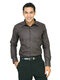

In [32]:
Image(fn[indices[0][5]])

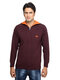

In [33]:
Image(fn[indices[0][6]])

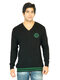

In [34]:
Image(fn[indices[0][7]])